# An EDA of the Top 50 artists on Spotify

__Summary of Dataset__
1. Data taken from Kaggle: https://www.kaggle.com/datasets/dhruvildave/spotify-charts
2. CSV file includes Top 200 and Viral 50 data from 1 January 2017 till 31 July 2021
3. Data organised into following columns:
  - Title of song
  - Rank of song in Top 200 or Viral 50
  - Date
  - Artist name
  - URL of song
  - Region (Country)
  - Chart
  - Whether the song has moved up, down etc. in chart
  - Number of streams

## Load libraries and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
import cufflinks as cf
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
# columns of interest, so to not upload entire CSV
cols_int = ['title','rank','date','artist','region','chart','streams']

df = pd.read_csv('data/charts.csv', usecols=cols_int)
df.head()

,title,rank,date,artist,region,chart,streams
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,Argentina,top200,253019.0
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,Argentina,top200,223988.0
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,Argentina,top200,210943.0
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",Argentina,top200,173865.0
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,Argentina,top200,153956.0


In [3]:
# Checking chart types logged
df['chart'].value_counts()

top200     20321904
viral50     5851610
Name: chart, dtype: int64

In [4]:
# Checking for how Spotify names The Netherlands
df.loc[df['region'] == 'Netherlands']

,title,rank,date,artist,region,chart,streams
5184,Energie,1,2017-01-01,"Ronnie Flex, Frenna",Netherlands,top200,112252.0
5185,Rockabye (feat. Sean Paul & Anne-Marie),2,2017-01-01,Clean Bandit,Netherlands,top200,106984.0
5186,Say You Won't Let Go,3,2017-01-01,James Arthur,Netherlands,top200,96067.0
5187,Het Is Een Feit,4,2017-01-01,"Broederliefde, Emms",Netherlands,top200,91829.0
5188,Starboy,5,2017-01-01,"The Weeknd, Daft Punk",Netherlands,top200,76076.0
...,...,...,...,...,...,...,...
26172114,Kindess (Tiguini),46,2021-07-31,O'Streaming,Netherlands,viral50,NaN
26172115,Ramenez la coupe à la maison,47,2021-07-31,Vegedream,Netherlands,viral50,NaN
26172116,Müslüm,48,2021-07-31,Hayat,Netherlands,viral50,NaN
26172117,Love Tonight,49,2021-07-31,Shouse,Netherlands,viral50,NaN


## Top 50 Most Streamed Songs in NL

__Summary__

In [5]:
top50_NL = df[(df['chart'] == 'top200') & (df['rank'] <= 50) & 
              ((df['region'] == 'Netherlands'))]

In [6]:
# Check data types
top50_NL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89495 entries, 5184 to 25262351
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    89495 non-null  object 
 1   rank     89495 non-null  int64  
 2   date     89495 non-null  object 
 3   artist   89495 non-null  object 
 4   region   89495 non-null  object 
 5   chart    89495 non-null  object 
 6   streams  89495 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 5.5+ MB


In [7]:
# Convert date into datetime type
top50_NL['date'] = pd.to_datetime(top50_NL['date'])

In [8]:
# Drop Region and Chart columns
top50_NL.drop(['region','chart'],axis=1,inplace=True)
top50_NL.sample(5)

,title,rank,date,artist,streams
3626963,Roses - Imanbek Remix,3,2020-05-23,SAINt JHN,197611.0
3820304,High Hopes,6,2019-01-02,Panic! At The Disco,135417.0
21452152,1-800-273-8255,26,2017-10-07,"Logic, Alessia Cara, Khalid",85959.0
11062649,Unforgettable,16,2017-07-01,"French Montana, Swae Lee",128150.0
23408904,Leuk,21,2021-11-20,"Antoon, Big2",133150.0


## Data Visualization

### Artists of Top 50 Streamed Songs [2017-2021]

In [23]:
def word_count_visual(freq):
    wc = WordCloud(width=1000, height=500,
                   max_font_size=150,
                   colormap='rainbow',
                   prefer_horizontal=.95,
                   background_color='white',random_state=42)
    
    cloud = wc.generate_from_frequencies(freq)
    plt.figure(figsize=(10,8))
    plt.title('Artists on Spotify Top 50 Streamed Songs in NL [2017-2021]')
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')

    plt.show;

In [10]:
# Note: This if for 2017-2021
top_artists = top50_NL['artist'].value_counts()
top_artists.head()

Ed Sheeran       2030
Dua Lipa         1362
Justin Bieber    1116
Boef             1069
The Weeknd       1012
Name: artist, dtype: int64

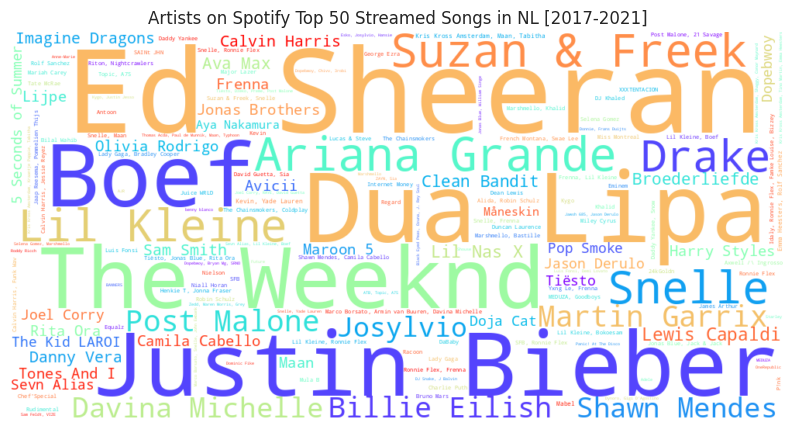

In [24]:
word_count_visual(top_artists)

In [12]:
# Number of times an artist has appeared in the Top 50 in NL
top50_NL['artist'].value_counts().head(50).iplot(kind='bar')

### Breakdown by Date

In [14]:
top50_NL['year'] = top50_NL['date'].dt.year
top50_NL['month'] = top50_NL['date'].dt.month
top50_NL['year-month'] = top50_NL['date'].dt.to_period('m')
top50_NL.head(2)

,title,rank,date,artist,streams,year,month,year-month
5184,Energie,1,2017-01-01,"Ronnie Flex, Frenna",112252.0,2017,1,2017-01
5185,Rockabye (feat. Sean Paul & Anne-Marie),2,2017-01-01,Clean Bandit,106984.0,2017,1,2017-01


In [17]:
month_streams = top50_NL.groupby(top50_NL['date'])[['streams']].sum()
month_streams.reset_index(inplace=True)
month_streams['year-month'] = month_streams['date'].dt.to_period('m')
month_streams

,date,streams,year-month
0,2017-01-01,2423858.0,2017-01
1,2017-01-02,3386047.0,2017-01
2,2017-01-03,3457137.0,2017-01
3,2017-01-04,3574480.0,2017-01
4,2017-01-05,3636208.0,2017-01
...,...,...,...
1785,2021-11-26,6614591.0,2021-11
1786,2021-11-27,6615004.0,2021-11
1787,2021-11-28,5369119.0,2021-11
1788,2021-11-29,5895370.0,2021-11


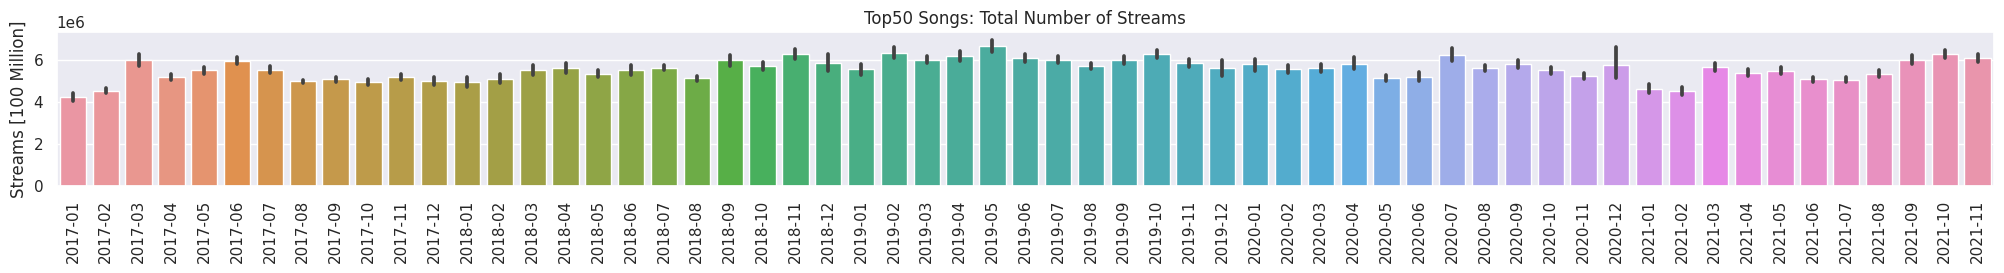

In [21]:
g = sns.barplot(x=month_streams['year-month'],y=month_streams['streams'])
g.set_title('Top50 Songs: Total Number of Streams')
g.set_ylabel('Streams [100 Million]')
g.set_xlabel('')
g.tick_params(axis='x', rotation=90)

In [26]:
# On average 10 streams = 0.03 euros
month_streams['Total_revenue'] = month_streams['streams']*0.03
month_streams['Artist_revenue'] = round(month_streams['Total_revenue']*0.3,2)
month_streams['Spotify_revenue'] = round(month_streams['Total_revenue']*0.7,2)
month_streams.sample(2)

,date,streams,year-month,Total_revenue,Artist_revenue,Spotify_revenue
1130,2020-02-09,4820081.0,2020-02,144602.43,43380.73,101221.70
1307,2020-08-04,5725703.0,2020-08,171771.09,51531.33,120239.76


In [46]:
month_streams['year-month2'] = month_streams['date'].dt.strftime('%Y-%M') #Nope retry
month_streams.head(2)

,date,streams,year-month,Total_revenue,Artist_revenue,Spotify_revenue,year-month2
0,2017-01-01,2423858.0,2017-01,72715.74,21814.72,50901.02,2017-00
1,2017-01-02,3386047.0,2017-01,101581.41,30474.42,71106.99,2017-00


In [47]:
# Total revenue made according to Top 50 songs by artists (30%), and Spotify (70%) [2017-2021]
# Heavy assumptions: All artists own all the royalties, based on 2023 earnings calculator)
# plt.figure(figsize=(10, 6))

# plt.stackplot(month_streams['year-month2'],month_streams['Artist_revenue'])


In [ ]:
# Song that was played the most

## Top 50 in BeNeLux: Examining the area and comparisons between countries

In [ ]:
top50_benelux = df[(df['chart'] == 'top200') & (df['rank'] <= 50) & 
              ((df['region'] == 'Netherlands') | (df['region'] == 'Belgium') | (df['region'] == 'Luxembourg'))]

In [ ]:
# Check for missing data
top50_benelux.isnull().sum()

title      0
rank       0
date       0
artist     0
region     0
chart      0
streams    0
dtype: int64

In [ ]:
# Check data types
top50_benelux.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187147 entries, 603 to 25262351
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   title    187147 non-null  object 
 1   rank     187147 non-null  int64  
 2   date     187147 non-null  object 
 3   artist   187147 non-null  object 
 4   region   187147 non-null  object 
 5   chart    187147 non-null  object 
 6   streams  187147 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 11.4+ MB


In [ ]:
# Convert date into datetime type
top50_benelux['date'] = pd.to_datetime(top50_benelux['date'])

/tmp/ipykernel_31267/2199489087.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top50_benelux['date'] = pd.to_datetime(top50_benelux['date'])


In [ ]:
top50_benelux.sample(15)

,title,rank,date,artist,region,chart,streams
1669642,Love Lies (with Normani),40,2018-06-02,Khalid,Belgium,top200,14239.0
6984205,SOS (feat. Aloe Blacc),6,2019-06-21,Avicii,Belgium,top200,38648.0
11383694,September Song,39,2017-05-08,JP Cooper,Netherlands,top200,67528.0
18116524,By Your Side (feat. Tom Grennan),30,2021-07-29,Calvin Harris,Netherlands,top200,79298.0
11561525,Slow Hands,37,2017-06-12,Niall Horan,Belgium,top200,12763.0
1522569,Chantaje (feat. Maluma),26,2017-02-28,Shakira,Netherlands,top200,71266.0
3442971,"Miljonair (feat. SBMG, Lil' Kleine, Boef & Ron...",26,2018-07-30,"$hirak, Lil Kleine",Belgium,top200,17098.0
7888619,Arcade,11,2019-06-30,Duncan Laurence,Netherlands,top200,141183.0
1925776,Bandolero,39,2018-06-07,Mula B,Netherlands,top200,76570.0
8883873,"Alone, Pt. II",28,2020-02-06,"Alan Walker, Ava Max",Belgium,top200,20210.0
